In [1]:
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
import datetime

In [2]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])

In [3]:
ds = [xr.open_dataset(path+f) for f in files]

In [4]:
for i in range(7):
    dsd = ds[i].resample(TIME='24H').mean()
    dsm = ds[i].resample(TIME='M').mean()
#    dsd.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/daily/"+files[i])
#    dsm.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/monthly/"+files[i])

In [12]:
files

['1okha.nc',
 '2mumbai.nc',
 '3jaigarh_5out.nc',
 '4goa.nc',
 '5udupi.nc',
 '6kollam.nc',
 '7kanyakumari_13out.nc']

In [13]:
codes = np.arange(1,15)

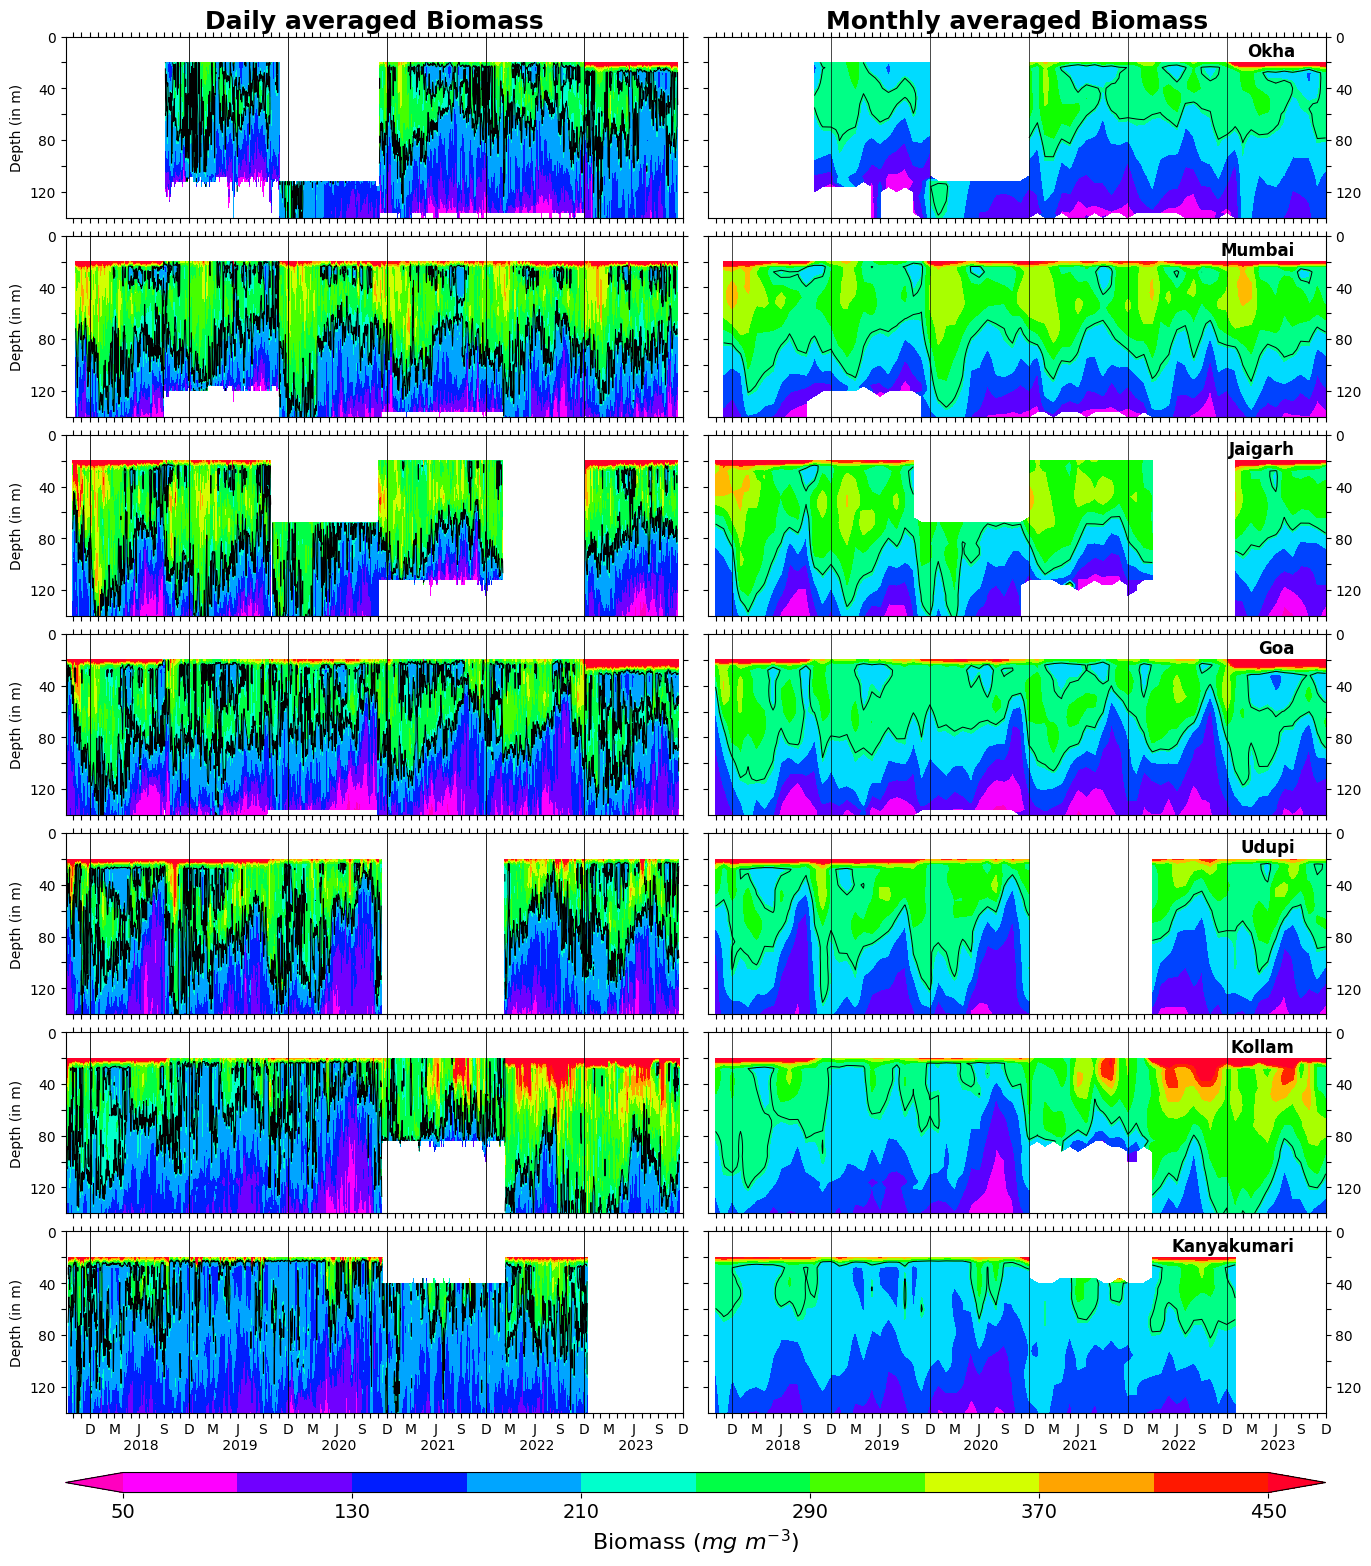

In [43]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(14,16),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
plt.subplots_adjust(wspace=0.04,left=0.05,bottom=0.09,top=0.95,hspace=0.1,right = 0.95)
custom_ticks = [0,20,40,60,80,100,120]
custom_labels = ['0','','40','','80','',120]
for i in range(7):
    dsd = ds[i].resample(TIME='24H').mean()
    dsm = ds[i].resample(TIME='M').mean()
    tklb = []
    for t in dsm.TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i,0].axvline(t,color='k',linewidth=0.6)
            ax[i,1].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")

    x = ax[i,0].contourf(dsd.TIME,dsd.DEPTH[5:],dsd.BIOMASS[:,5:,0,0].T,levels=np.arange(50,490,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contourf(dsm.TIME,dsm.DEPTH[5:],dsm.BIOMASS[:,5:,0,0].T,levels=np.arange(50,450,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contour(dsm.TIME,dsm.DEPTH[5:],dsm.BIOMASS[:,5:,0,0].T,levels=[215],linewidths=0.7,colors='k')
    ax[i,0].contour(dsd.TIME,dsd.DEPTH[5:],dsd.BIOMASS[:,5:,0,0].T,levels=[215],linewidths=0.7,colors='k')
    ax[i,1].text(0.95, 0.97, names[i],transform=ax[i,1].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i,0].set_ylabel("Depth (in m)")
    ax[i,0].set_yticks(custom_ticks)
    ax[i,0].set_yticklabels(custom_labels)
#    ax[i,1].set_yticks(custom_ticks)    
    ax[i,0].tick_params(right=True, top=True,labeltop=False)
    ax[i,1].tick_params(right=True, top=True,labelright=True)
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()
    
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()

ax[1,1].set_xticks(dsm.TIME,tklb)

ax[0,0].set_title("Daily averaged Biomass",fontsize=18,fontweight='bold')
ax[0,1].set_title("Monthly averaged Biomass",fontsize=18,fontweight='bold')


cax = fig.add_axes([0.05, 0.04, 0.9,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
cbar.set_label("Biomass ($mg \ m^{-3}$)",fontsize=16)
cbar.ax.tick_params(labelsize=14)

#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/biomass_daily_monthly.png",dpi=300,facecolor='w')

# for just montly values

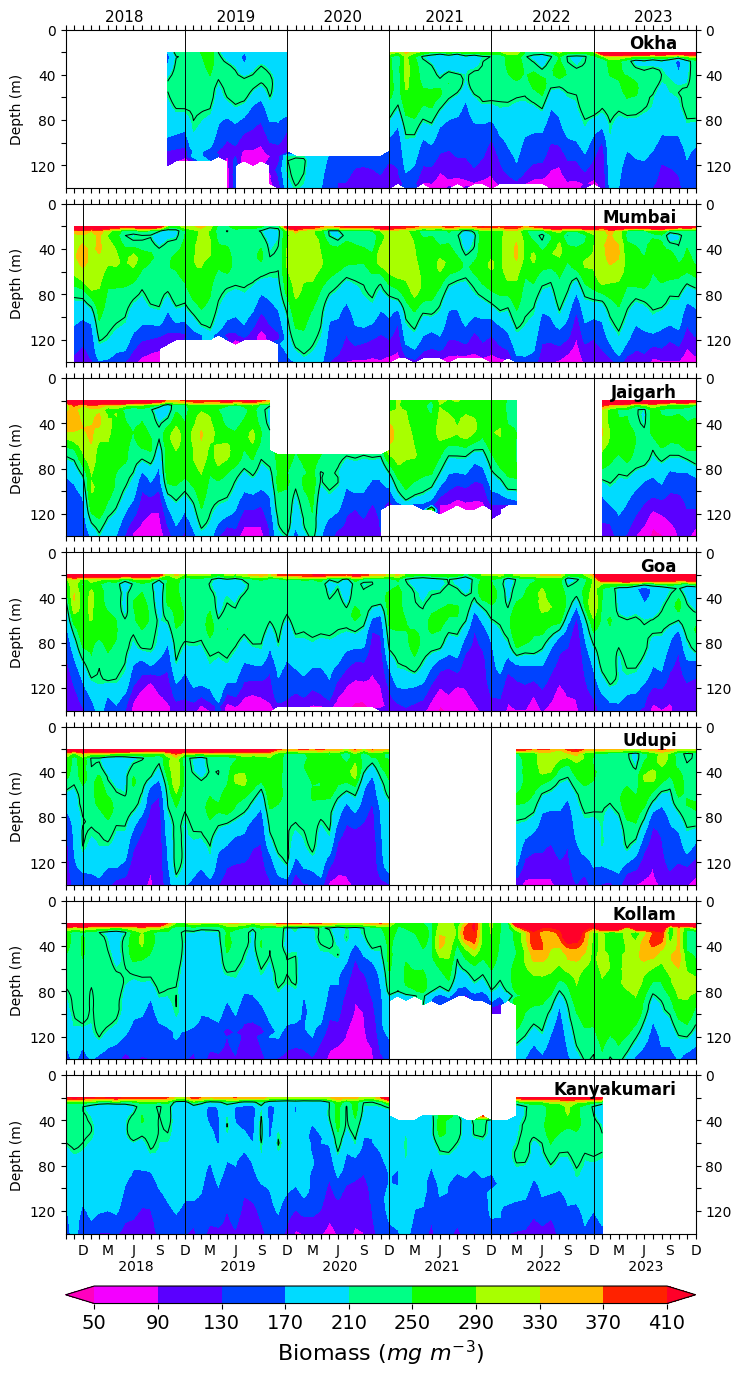

In [41]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(7,14),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
plt.subplots_adjust(wspace=0.04,left=0.05,bottom=0.09,top=0.95,hspace=0.1,right = 0.95)
custom_ticks = [0,20,40,60,80,100,120]
custom_labels = ['0','','40','','80','',120]
for i in range(7):
    dsm = ds[i].resample(TIME='M').mean()
    tklb = []
    for t in dsm.TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
            ax[i].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")

    x = ax[i].contourf(dsm.TIME,dsm.DEPTH[5:],dsm.BIOMASS[:,5:,0,0].T,levels=np.arange(50,450,40),extend="both",cmap="gist_rainbow_r")
    ax[i].contour(dsm.TIME,dsm.DEPTH[5:],dsm.BIOMASS[:,5:,0,0].T,levels=[215],linewidths=0.7,colors='k')
    ax[i].text(0.97, 0.97, names[i],transform=ax[i].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i].set_ylabel("Depth (m)")
    ax[i].set_yticks(custom_ticks)
    ax[i].set_yticklabels(custom_labels)
    ax[i].tick_params(right=True, top=True,labeltop=False)
    ax[i].tick_params(right=True, top=True,labelright=True)
    ax[i].set_ylim(ymin=0,ymax=140)
    ax[i].invert_yaxis()
    
    ax[i].set_ylim(ymin=0,ymax=140)
    ax[i].invert_yaxis()

ax[1].set_xticks(dsm.TIME,tklb)

ax[0].set_title("        2018               2019              2020             2021              2022             2023",fontsize=11,loc='left')


cax = fig.add_axes([0.05, 0.04, 0.9,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
cbar.set_label("Biomass ($mg \ m^{-3}$)",fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/biomass_monthly.png",dpi=300,facecolor='w')

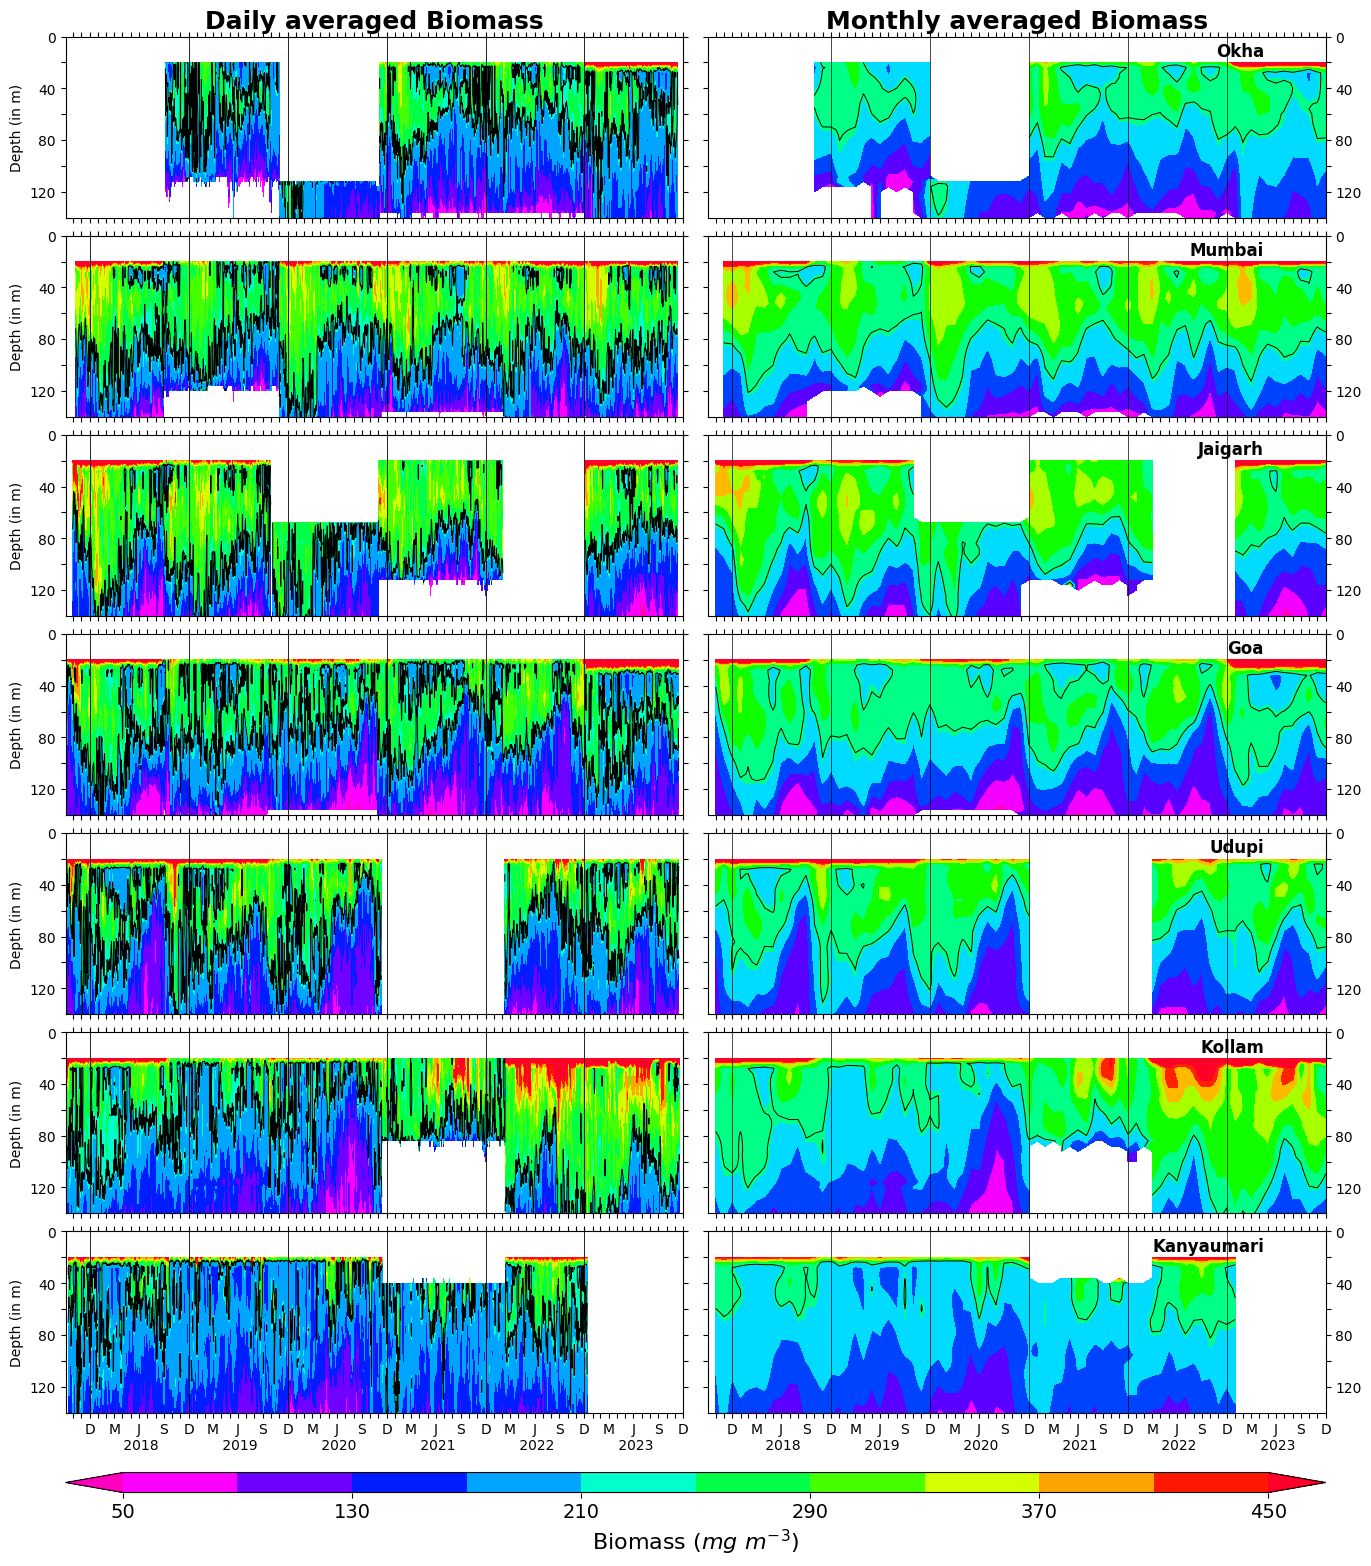

In [42]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(14,16),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyaumari"]
plt.subplots_adjust(wspace=0.04,left=0.05,bottom=0.09,top=0.95,hspace=0.1,right = 0.95)
custom_ticks = [0,20,40,60,80,100,120]
custom_labels = ['0','','40','','80','',120]
for i in range(7):
    dsd = ds[i].resample(TIME='24H').mean()
    dsm = ds[i].resample(TIME='M').mean()
    tklb = []
    for t in dsm.TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i,0].axvline(t,color='k',linewidth=0.6)
            ax[i,1].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")

    x = ax[i,0].contourf(dsd.TIME,dsd.DEPTH[5:],dsd.BIOMASS[:,5:,0,0].T,levels=np.arange(50,490,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contourf(dsm.TIME,dsm.DEPTH[5:],dsm.BIOMASS[:,5:,0,0].T,levels=np.arange(50,450,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contour(dsm.TIME,dsm.DEPTH[5:],dsm.BIOMASS[:,5:,0,0].T,levels=[215],linewidths=0.7,colors='k')
    ax[i,0].contour(dsd.TIME,dsd.DEPTH[5:],dsd.BIOMASS[:,5:,0,0].T,levels=[215],linewidths=0.7,colors='k')
    ax[i,1].text(0.9, 0.97, names[i],transform=ax[i,1].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i,0].set_ylabel("Depth (in m)")
    ax[i,0].set_yticks(custom_ticks)
    ax[i,0].set_yticklabels(custom_labels)
#    ax[i,1].set_yticks(custom_ticks)    
    ax[i,0].tick_params(right=True, top=True,labeltop=False)
    ax[i,1].tick_params(right=True, top=True,labelright=True)
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()
    
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()

ax[1,1].set_xticks(dsm.TIME,tklb)

ax[0,0].set_title("Daily averaged Biomass",fontsize=18,fontweight='bold')
ax[0,1].set_title("Monthly averaged Biomass",fontsize=18,fontweight='bold')

#ax[6,0].text(0.05, -0.2, "2017          2018           2019          2020          2021         2022",transform=ax[6,0].transAxes, fontsize=12, va='center', ha='left',color='black')
#ax[6,1].text(0.05, -0.2, "2017          2018           2019          2020          2021         2022",transform=ax[6,1].transAxes, fontsize=12, va='center', ha='left',color='black')


cax = fig.add_axes([0.05, 0.04, 0.9,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
cbar.set_label("Biomass ($mg \ m^{-3}$)",fontsize=16)
cbar.ax.tick_params(labelsize=14)

#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/biomass_daily_monthly.png",dpi=300,facecolor='w')

# climatology of standing stock

In [16]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/ss_merge/ss_calc/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])
dsd = [xr.open_dataset(path+f) for f in files]
dsm = [dsd[i].resample(TIME='1M').mean() for i in range(len(files))]

for i in range(7):
    clim = dsm[i].groupby('TIME.month').mean(dim='TIME')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan)
    print(aa.min().values,aa.max().values,"range",-aa.min().values+aa.max().values)

16.772902351470826 21.45532156253737 range 4.682419211066545
19.3740237001598 26.578440227468253 range 7.204416527308453
18.770355442690814 25.666070545338982 range 6.895715102648168
16.118292285252128 22.17000692284134 range 6.05171463758921
16.857720439929015 21.935171256002764 range 5.07745081607375
20.187096191594442 23.75781566678021 range 3.5707194751857685
16.479167381611653 18.31905539283676 range 1.8398880112251064


# Try plotting in polar project

Text(0.5, 0.98, 'Depth integrated Standing Stock')

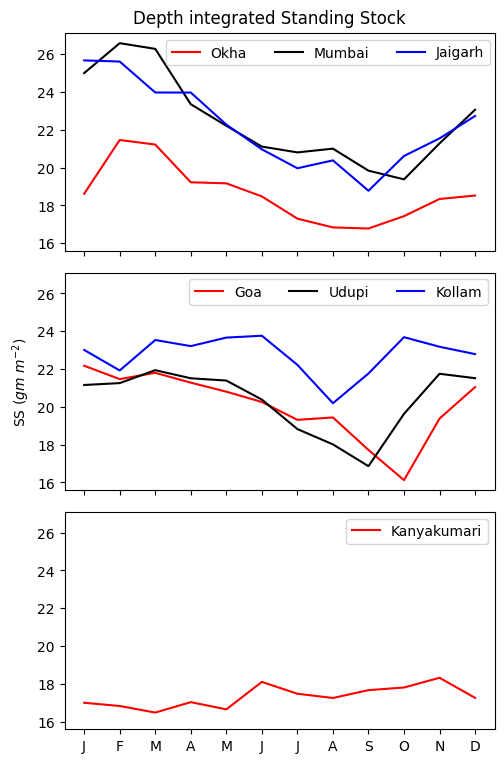

In [27]:

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(5,8),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
colors = ['r','k','b','r','k','b','r']

#linestyles = ['-','--','-.','-','--','-.','-']

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.08,top=0.95,hspace=0.1,right = 0.95)
for i in range(3):
    clim = dsm[i].groupby('TIME.month').mean(dim='TIME')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan)
    ax[0].plot(aa,color=colors[i],label=names[i])
ax[0].legend(bbox_to_anchor=(0.22,1), ncol=3)

for i in range(3,6):
    clim = dsm[i].groupby('TIME.month').mean(dim='TIME')
    aa = clim.SS[:,0,0].T    
    aa = aa.where(aa!=0,np.nan)
    ax[1].plot(aa,color=colors[i],label=names[i])
ax[1].legend(bbox_to_anchor=(1,1), ncol=3)
ax[1].set_ylabel("SS ($gm \ m^{-2}$)")

for i in range(6,7):
    clim = dsm[i].groupby('TIME.month').mean(dim='TIME')
    aa = clim.SS[:,0,0].T 
    aa = aa.where(aa!=0,np.nan)
    ax[2].plot(aa,color=colors[i],label=names[i])
ax[2].legend(bbox_to_anchor=(1,1), ncol=3)


ax[2].set_xticks(np.arange(0,12,1))
ax[2].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
fig.suptitle("Depth integrated Standing Stock")

#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/standing_stock_dep_22_118_all_aval.png",dpi=300,facecolor='w')


# shows propagation

Text(0.5, 1.0, 'Depth integrated Standing Stock')

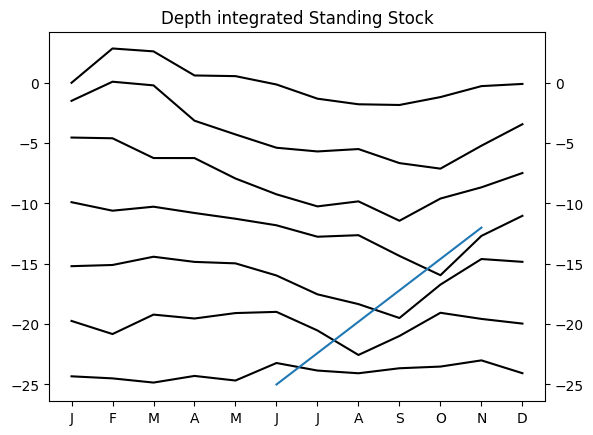

In [65]:

names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
colors = ['r','k','b','r','k','b','r']

#linestyles = ['-','--','-.','-','--','-.','-']

for i in range(7):
    clim = dsm[i].groupby('TIME.month').mean(dim='TIME')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan) 
    aa = aa - np.mean(aa) - 4 * i
    plt.plot(aa,color='k',label=names[i])
    plt.gca().set_xticks(np.arange(0,12,1))

plt.gca().tick_params(right=True,labelright=True)
plt.plot([5,10],[-25,-12])
plt.gca().set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.title("Depth integrated Standing Stock")

#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/standing_stock_dep_22_118_all_aval.png",dpi=300,facecolor='w')


# 40 and 100 m biomass comparison

In [7]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])
ds = [xr.open_dataset(path+f) for f in files]

In [8]:
dsd = [ds[i].resample(TIME='24H').mean() for i in range(len(files))]


In [9]:
dsm = [ds[i].rolling(TIME=720,min_periods=48).mean() for i in range(len(files))]

In [10]:
dsmon = [ds[i].resample(TIME='M').mean() for i in range(7)]


In [14]:
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]

for i in range(7):
    mean40 = dsm[i].BIOMASS[:,10,0,0].T.mean()
    mean104 = dsm[i].BIOMASS[:,26,0,0].T.mean()
    diff = mean40 - mean104
    print(names[i],"range",diff.values)
    

Okha range 80.76743775933733
Mumbai range 90.1610305466995
Jaigarh range 91.96633648295872
Goa range 72.13507114436362
Udupi range 78.30019640152051
Kollam range 63.1505732373472
Kanyakumari range 41.14543433178372


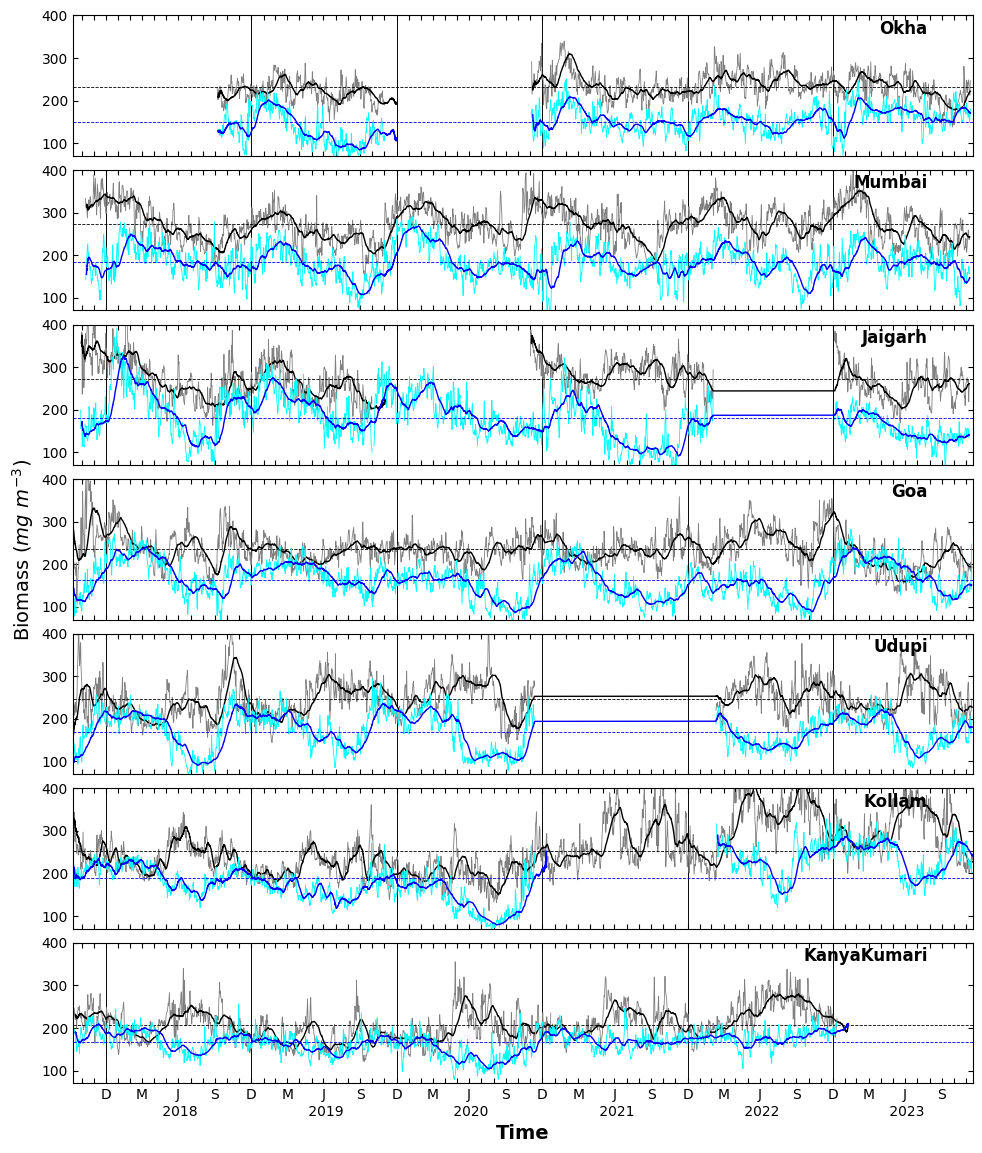

In [54]:
import pandas as pd

fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(10,12),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","KanyaKumari"]
plt.subplots_adjust(wspace=0.04,left=0.07,bottom=0.06,top=0.95,hspace=0.1,right = 0.97)
for i in range(7):
    tklb = []
    for t in dsmon[i].TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
            ax[i].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
            
    ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS[:,10,0,0].T,linewidth=0.6,color='grey',label="daily biomass (40m)")
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS[:,10,0,0].T,linewidth=1,color='k',label="monthly biomass (40m)")
    # plot the mean line for each
    ax[i].axhline(dsm[i].BIOMASS[:,10,0,0].T.mean(),linewidth=0.6,linestyle='--',color='black',label="mean (40m)")
    ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS[:,26,0,0].T,linewidth=0.6,color='cyan',label="daily biomass (104m)")
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS[:,26,0,0].T,linewidth=1,color='blue',label="monthly biomass (104m)")

    ax[i].axhline(dsm[i].BIOMASS[:,26,0,0].T.mean(),linewidth=0.6,linestyle='--',color='blue',label="mean (104m)")

    ax[i].set_xticks(dsmon[i].TIME,tklb)

    ax[i].text(0.95, 0.97, names[i],transform=ax[i].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i].tick_params(axis='both', which='both', direction='in', right=True, top=True)

    
    ax[i].set_xlim(xmin=dsd[i].TIME[0],xmax=dsd[i].TIME[-1])
    ax[i].set_ylim(ymin=70,ymax=400)

ax[3].set_ylabel('Biomass ($mg \ m^{-3}$)',fontsize=14)    


#ax[0].legend(loc='upper left')

ax[6].set_xlabel("Time",fontsize=14,fontweight='bold')

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/figure_02_biomass_40m_104m.png",dpi=300,facecolor='w')